In [1]:
from neural_features import ResNet50FeatureExtractor
import numpy as np
import pandas as pd
from torchvision.models import resnet50
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import shutil
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from neighbor_distances import CentroidWeights



In [2]:
train_small_names = pd.read_csv('../dataset/train_small.csv', header=None)
train_unlabeled_names = pd.read_csv('../dataset/train_unlabeled.csv', header=None)

small_dataset = np.load('../dataset/small_train_features.npz', 'r')
X = small_dataset['X']
X_label = small_dataset['y']

queryset = np.load('../dataset/train_unlabeled_features.npz', 'r')
Q = queryset['X']
Q_label = queryset['y']

In [3]:
def image_retrieval_using_knn(n_neighbors, dataset, queryset, standardize = True, print_conf_matrix=True, print_class_report = True, weights='uniform'):
    std_pipeline = Pipeline([
        ('scaler', StandardScaler()),              # Standardization step
        ('knn', KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)) 
    ])

    pipeline = Pipeline([
        ('knn', KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights))  
    ])

    if standardize:
        std_pipeline.fit(dataset[0], dataset[1])
        predictions = std_pipeline.predict(queryset[0])
    else:
        pipeline.fit(dataset[0], dataset[1])
        predictions = pipeline.predict(queryset[0])

    if print_conf_matrix:
        cm = confusion_matrix(queryset[1], predictions, labels=range(251))

        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        # Set the figure size
        plt.figure(figsize=(20, 15))

        # Plot using Seaborn's heatmap
        sns.heatmap(
            cm_normalized,
            cmap='viridis',
            cbar=True,
            square=False,  # Use rectangular cells for better fit
            xticklabels=25,  # Show only 25 x-axis labels to avoid clutter
            yticklabels=25  # Show only 25 y-axis labels to avoid clutter
        )

        # Rotate and set axis labels
        plt.xlabel('Predicted Labels', fontsize=14)
        plt.ylabel('True Labels', fontsize=14)
        plt.title('Normalized Confusion Matrix (250 Classes)', fontsize=18)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)

        # Display the plot
        plt.show()
    
    if print_class_report:
        cr = classification_report(queryset[1], predictions, labels=range(251), zero_division=0)
        print("\nClassification Report:")
        print(cr)
    
    return predictions
    

# Image retrieval using 1NN

/tmp/ipykernel_8270/2729123172.py:21: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


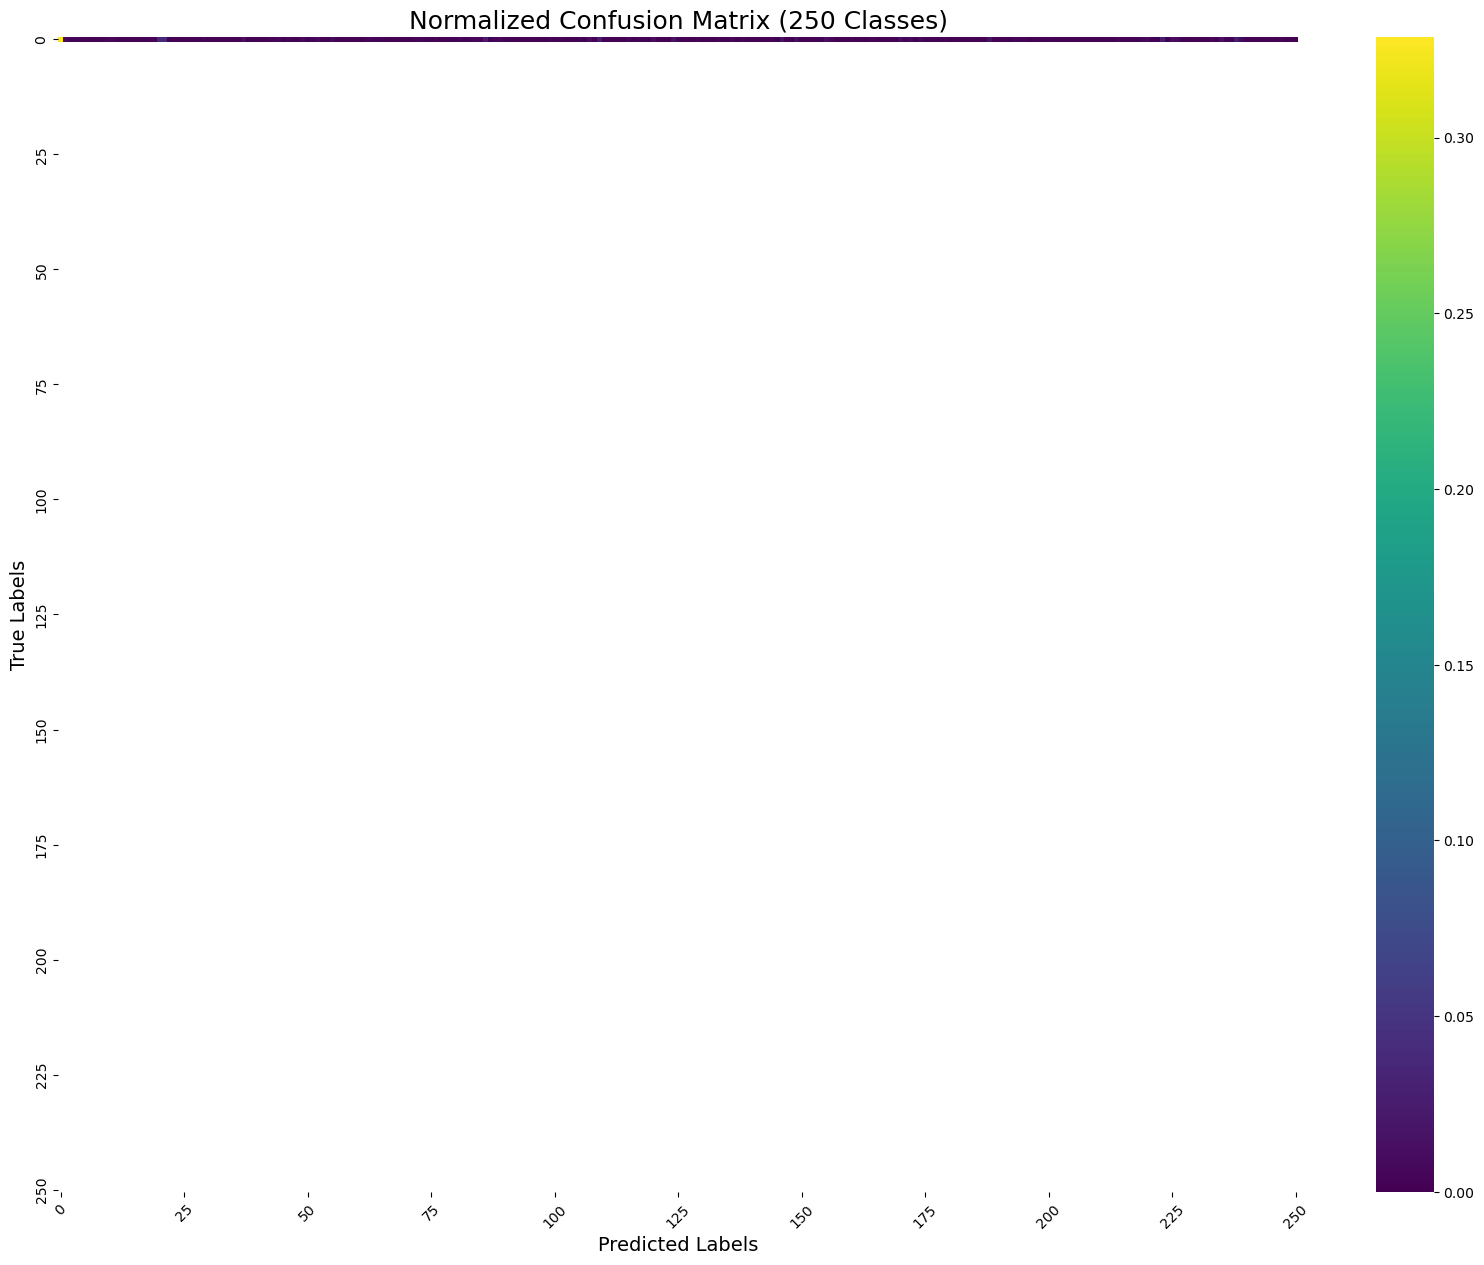


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.49       633
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
   

In [4]:
predictions = image_retrieval_using_knn(1, (X, X_label), (Q, np.zeros((len(Q),))), False)

In [5]:
predictions

array([136, 235,  21,   0, 116,   0, 162,   0, 174,   0,   0, 144,  37,
         0, 109, 170,  21, 124, 120, 233,   0,   0, 107, 120,   0, 223,
        44, 238,   0,   0, 107, 164, 238,  26, 124,   0,   0,  81,   0,
         0, 174, 146,   0, 138,   0, 109,  52,   0, 238, 223,   0,  83,
         0,  46,  72, 236, 239,  89,   0,  21,   0, 120, 230,  62,  37,
       115, 220,   0,   0,   4, 120, 214,   0, 215,  37,   2,   0, 109,
         0, 174,   0, 195,  50,  79, 125,   0,   0, 109,  20,  83, 107,
         0, 223,   0, 115,  31,   0,   0, 223,   0,   0,   0, 223,   0,
        46,  63,   0, 247,   0,  10,   0,  91, 194,  21,  20,  86, 235,
       233, 170,   0,   0,   0, 109,   0, 226, 125,  20,  68,   0, 109,
       171, 115, 223,   0, 223,  86, 160,  20, 174,   0, 220,  21,  37,
       155,   0, 172, 169, 239,   0,  44,   0, 188,   0,   0,  20,  65,
         0, 124, 225,   0,  62,   3,   0,   0, 223,  20, 193,   0, 247,
       238, 120, 129, 149,   0,   0,  21,   0,   0, 109,   0, 14

In [6]:
for i, name in enumerate(train_small_names[0].to_list()):
    #shutil.copyfile(f'../dataset/train_set/{name}', f'../dataset/check_discrimination/{y_pred[i-1]}/QUERY_{name}')
    print(f'Copy image {name} to {predictions[i-1]} folder')

Copy image train_059371.jpg to 1 folder
Copy image train_059389.jpg to 136 folder
Copy image train_059425.jpg to 235 folder
Copy image train_059445.jpg to 21 folder
Copy image train_059516.jpg to 0 folder
Copy image train_059538.jpg to 116 folder
Copy image train_059541.jpg to 0 folder
Copy image train_059570.jpg to 162 folder
Copy image train_059713.jpg to 0 folder
Copy image train_059719.jpg to 174 folder
Copy image train_059744.jpg to 0 folder
Copy image train_059789.jpg to 0 folder
Copy image train_059795.jpg to 144 folder
Copy image train_059837.jpg to 37 folder
Copy image train_059855.jpg to 0 folder
Copy image train_059893.jpg to 109 folder
Copy image train_059917.jpg to 170 folder
Copy image train_059919.jpg to 21 folder
Copy image train_059921.jpg to 124 folder
Copy image train_059928.jpg to 120 folder
Copy image train_089398.jpg to 233 folder
Copy image train_089407.jpg to 0 folder
Copy image train_089435.jpg to 0 folder
Copy image train_089456.jpg to 107 folder
Copy image tr

IndexError: index 633 is out of bounds for axis 0 with size 633

# Image retrieval using 1NN with standardized data 

/tmp/ipykernel_5794/2729123172.py:21: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


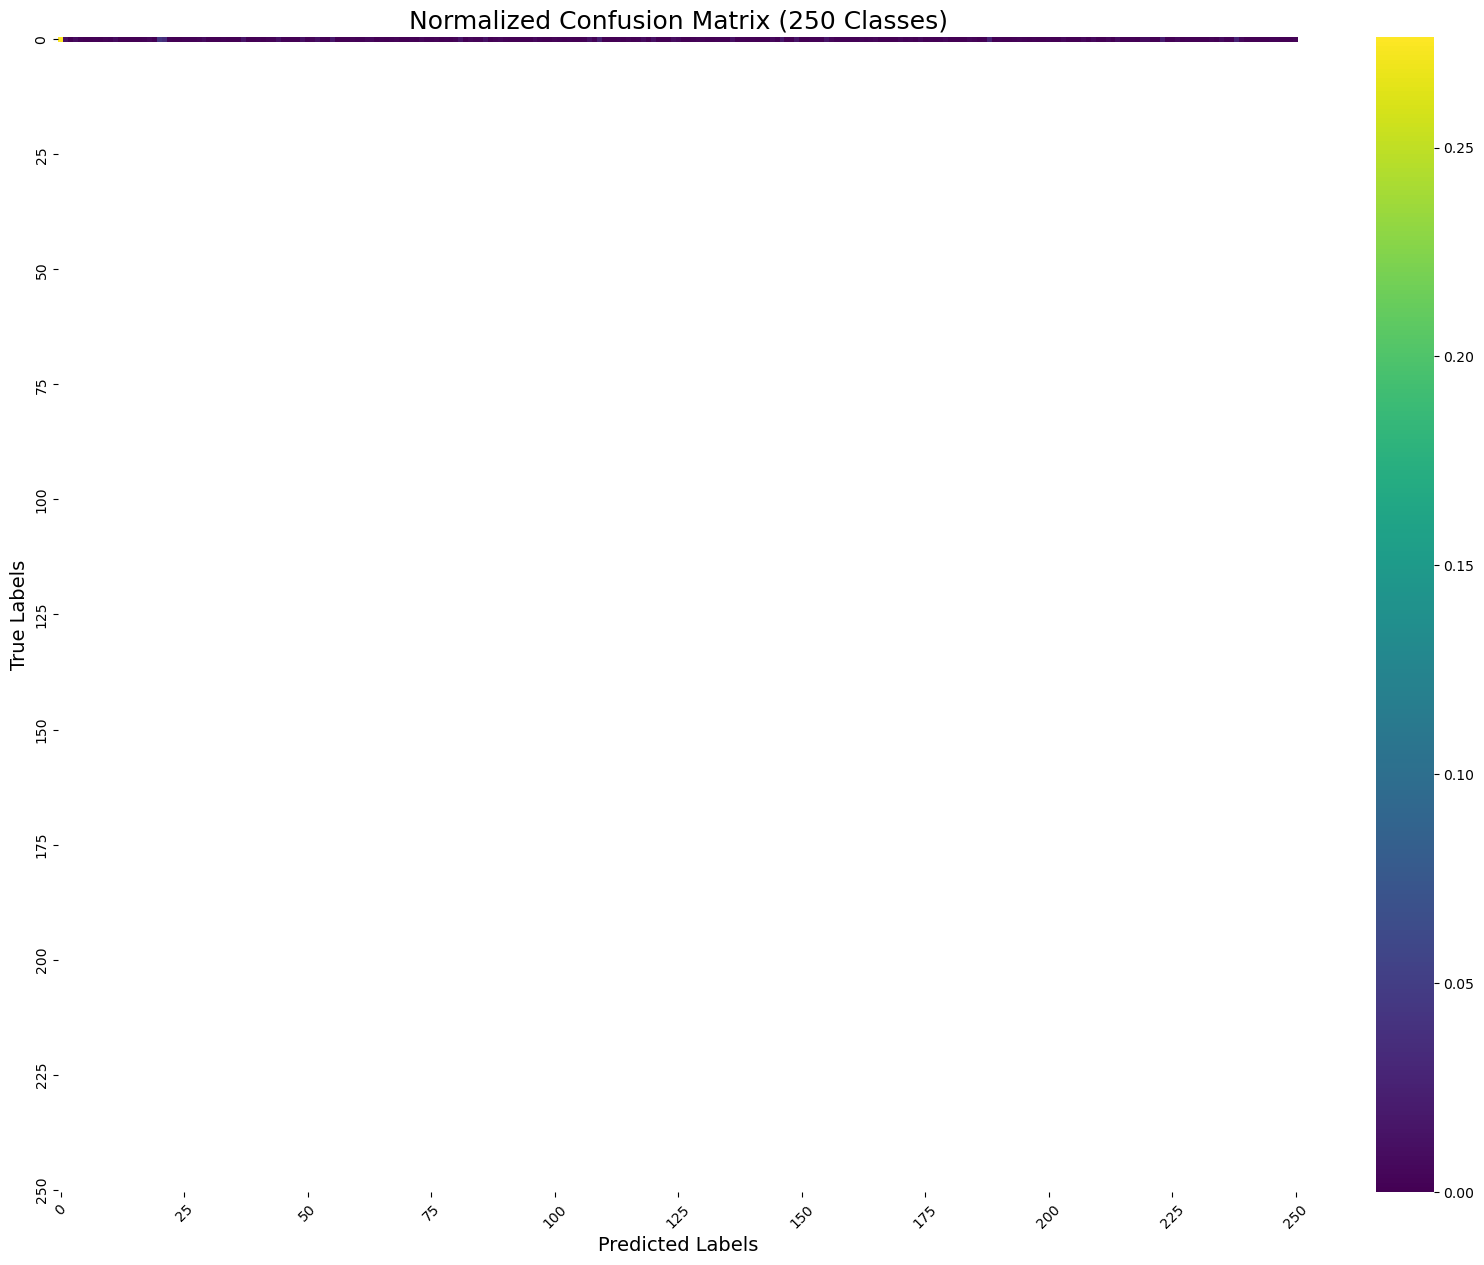


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.28      0.43       633
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
   

In [ ]:
predictions = image_retrieval_using_knn(1, (X, X_label), (Q, np.zeros((len(Q),))), True)

# Image retrieval using 1NN with standardized weighted

In [31]:
predictions = image_retrieval_using_knn(1, (X, X_label), (Q, np.zeros((len(Q),))), standardize=True, weights='distance', print_conf_matrix=False)



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.28      0.43       633
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
   

# Image retrieval using 1NN with standardized weighted

In [16]:
centroid_weights = CentroidWeights(X, X_label)

predictions_weighted = image_retrieval_using_knn(50, (X, X_label), (Q, np.zeros((len(Q),))), weights=centroid_weights, print_conf_matrix=False)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.27      0.43       633
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
   

In [12]:
predictions_no_weighted = image_retrieval_using_knn(5, (X, X_label), (Q, np.zeros((len(Q),))), print_conf_matrix=False)



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.45      0.62       633
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
   

In [14]:
predictions_no_weighted 

array([ 11,   0,  21,   0,   2,   0,  10,   0, 174,   0,   0, 188,  37,
         0,  20,   0,   0,  18,  44,  53,   0,   0,  42,  28,   0,   0,
         0,   0,   0,   0,   5,   7,  26,  26,   0,   0,   0, 100, 203,
         0,   0, 188,   0,   0,   0, 109,   0,   0,   0,   0,   0,  13,
         0,  11,   0,  86,   0,  21,   0,   0, 226,  46,  19,  62,   8,
        44,  11,   0,   0,   4, 120,   0,   0,  37,  37,   0,   0, 109,
         0, 174,   0,  25,  43,  57,  67,   0,   0,  63,  20,   3,  49,
         0,  20,  21,   5,   0,   0,   0,   0,   0, 109,   0,  19,   0,
         0,  40,   0,   0,   0,   9,   0,  40,   0,  21,   0,   0,   9,
        35,  52,   0,   0,   7,  60,   0, 145,  11,  20,  55,   0,  52,
        81,  21,  20,   0,  20,  21,  11,  20, 136,   0,  11,  21, 171,
        20,   0, 172,   1,   2,   0, 136, 188, 188,   0,   0,   0,   0,
         9, 124,  20,   0,  62,   0,   0,   0,  81,  20,  46,   0,  48,
        21,  81,  60,  11,   0,   0,   0,  21,   0, 109,   0,  4